In [1]:
import pandas as pd
from utils import evaluate
from sklearn.preprocessing import MinMaxScaler
from utils.evaluate import calculate_cosine_similarity
import re

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [11]:
data1 = pd.read_csv("resource/experiment_results/standard/llama2-13b-300.csv")

In [17]:
data1

,Unnamed: 0,temperature,model,ground_truth,prompt,response,extracted_answer,label,time_cost
0,0,0.1,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.553269
1,1,0.4,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.552879
2,2,0.7,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.545521
3,3,1.0,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.556475
4,4,1.3,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.546265
...,...,...,...,...,...,...,...,...,...
2093,2093,0.7,llama213b,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Tim McCann,True,0.208768
2094,2094,1.0,llama213b,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Tim McCann,True,0.208057
2095,2095,1.3,llama213b,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Tim McCann,True,0.208612
2096,2096,1.6,llama213b,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Tim McCann,True,0.208462


In [18]:
result1 = pd.read_csv(
    "resource/experiment_results/standard/text_generation_api_llama2_7B_4bit_300.csv"
)
result2 = pd.read_csv(
    "resource/experiment_results/standard/text_generation_api_llama2_13B_4bit_300.csv"
)
data = pd.concat([result1, result2], ignore_index=True)
data.drop(columns=["Unnamed: 0"], inplace=True)
data["generated_response"] = data["generated_response"].astype(str)

In [19]:
data

,temperature,model,ground_truth_response,prompt,full answer,generated_response,label,elapsed_time,timestamp
0,0.1,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,14.744301,2024-03-24 18:11:01
1,0.4,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.322552,2024-03-24 18:11:02
2,0.7,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.077408,2024-03-24 18:11:03
3,1.0,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.069396,2024-03-24 18:11:04
4,1.3,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.070688,2024-03-24 18:11:05
...,...,...,...,...,...,...,...,...,...
4196,0.7,LLama_13B,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,The director of White Rabbit is Tim McCann.,True,0.628973,2024-03-24 23:23:36
4197,1.0,LLama_13B,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,The director of White Rabbit is Tim McCann,True,1.495790,2024-03-24 23:23:38
4198,1.3,LLama_13B,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,"The director of White Rabbit, as per the given...",True,0.842999,2024-03-24 23:23:39
4199,1.6,LLama_13B,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Tim McCann,True,2.271475,2024-03-24 23:23:41


In [2]:
data1 = pd.read_csv(
    "resource/experiment_results/standard/text_generation_api_llama2_7B_4bit_300.csv"
)
data2 = pd.read_csv(
    "resource/experiment_results/standard/text_generation_api_llama2_13B_4bit_300.csv"
)
data3 = pd.read_csv("resource/experiment_results/standard/Mistral7_8b-300.csv")
data = pd.concat([data1, data2, data3], ignore_index=True)
data.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
data.head()

,temperature,model,ground_truth_response,prompt,full answer,generated_response,label,elapsed_time,timestamp
0,0.1,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,14.744301,2024-03-24 18:11:01
1,0.4,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.322552,2024-03-24 18:11:02
2,0.7,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.077408,2024-03-24 18:11:03
3,1.0,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.069396,2024-03-24 18:11:04
4,1.3,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.070688,2024-03-24 18:11:05


In [23]:
def extract_answers(text):
    pattern = re.compile(r"<Answer>(.*?)</Answer>|<Answer>(.*?)<Answer>")
    matches = pattern.findall(text)
    contents = [
        match[0].strip() if match[0] else match[1].strip()
        for match in matches
        if match[0] or match[1]
    ]
    result_str = "\n".join(contents)
    if contents:
        return True, result_str
    else:
        return False, text


# Extract core information
data["is_well_matching"], data["generated_response_matching"] = zip(
    *data["generated_response"].apply(extract_answers)
)

data["generated_response_matching"] = data["generated_response_matching"].apply(
    lambda x: x.replace("Your answer here", "") if "Your answer here" in x else x
)

In [24]:
data

,temperature,model,ground_truth_response,prompt,full answer,generated_response,label,elapsed_time,timestamp,is_well_matching,generated_response_matching
0,0.1,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,14.744301,2024-03-24 18:11:01,False,Virgin Australia started operating on August 3...
1,0.4,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.322552,2024-03-24 18:11:02,False,Virgin Australia started operating on August 3...
2,0.7,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.077408,2024-03-24 18:11:03,False,Virgin Australia started operating on August 3...
3,1.0,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.069396,2024-03-24 18:11:04,False,Virgin Australia started operating on August 3...
4,1.3,LLama_7B,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.070688,2024-03-24 18:11:05,False,Virgin Australia started operating on August 3...
...,...,...,...,...,...,...,...,...,...,...,...
4196,0.7,LLama_13B,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,The director of White Rabbit is Tim McCann.,True,0.628973,2024-03-24 23:23:36,False,The director of White Rabbit is Tim McCann.
4197,1.0,LLama_13B,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,The director of White Rabbit is Tim McCann,True,1.495790,2024-03-24 23:23:38,False,The director of White Rabbit is Tim McCann
4198,1.3,LLama_13B,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,"The director of White Rabbit, as per the given...",True,0.842999,2024-03-24 23:23:39,False,"The director of White Rabbit, as per the given..."
4199,1.6,LLama_13B,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Tim McCann,True,2.271475,2024-03-24 23:23:41,False,Tim McCann


In [25]:
# Calculate BLEU
ground_truth_responses = data["ground_truth_response"].to_list()
generated_responses = data["generated_response_matching"].to_list()

scores = evaluate.calculate_bleu_scores_smooth(
    ground_truth_responses, generated_responses
)
data["BLEU"] = scores

# Calculate Cosimularity
data["cosine_similarity"] = data.apply(
    lambda row: calculate_cosine_similarity(
        row["generated_response_matching"][:512], row["ground_truth_response"][:512]
    ),
    axis=1,
)
# Change data formate to avoid float to string

from utils.evaluate import jaccard_similarity
from utils.evaluate import levenshtein_similarity
from utils.evaluate import bow_similarity
from utils.evaluate import tfidf_similarity

data["jaccard_similarity"] = data.apply(
    lambda row: jaccard_similarity(
        row["generated_response_matching"], row["ground_truth_response"]
    ),
    axis=1,
)

data["bow_similarity"] = data.apply(
    lambda row: bow_similarity(
        row["generated_response_matching"], row["ground_truth_response"]
    ),
    axis=1,
)


data["tfidf_similarity"] = data.apply(
    lambda row: tfidf_similarity(
        row["generated_response_matching"], row["ground_truth_response"]
    ),
    axis=1,
)

data["levenshtein_similarity"] = data.apply(
    lambda row: levenshtein_similarity(
        row["generated_response_matching"], row["ground_truth_response"]
    ),
    axis=1,
)

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [32]:
data = data[(data["model"] == "LLama_7B") | (data["model"] == "LLama_13B")]

In [33]:
data["model"] = data["model"].apply(lambda x: x + "_4bits")

/tmp/ipykernel_1388/145906503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["model"] = data["model"].apply(lambda x: x + "_4bits")


In [1]:
data.to_csv("300_questions_4bits_post_processed_simularities.csv")

NameError: name 'data' is not defined

In [1]:
import pandas as pd
from utils import evaluate
from sklearn.preprocessing import MinMaxScaler
from utils.evaluate import calculate_cosine_similarity
import re

data = pd.read_csv(
    "resource/experiment_results/postprocessing/300_questions_post_processed.csv"
)
data_copy = data[
    (data["model"] == "llama213b")
    | (data["model"] == "Mistral7_8b")
    | (data["model"] == "llama270b")
]

data["temperature"] = data["temperature"].astype(float)
data["cosine_similarity"] = data["cosine_similarity"].astype(float)
data["ground_truth"] = data["ground_truth"].astype(str)
data["generated_response_matching"] = data["generated_response_matching"].astype(str)

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [36]:
data

,temperature,model,ground_truth_response,prompt,full answer,generated_response,label,elapsed_time,timestamp,is_well_matching,generated_response_matching,BLEU,cosine_similarity,jaccard_similarity,bow_similarity,tfidf_similarity,levenshtein_similarity
0,0.1,LLama_7B_4bits,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,14.744301,2024-03-24 18:11:01,False,Virgin Australia started operating on August 3...,0.03,0.777539,0.238095,0.726273,0.588322,0.443396
1,0.4,LLama_7B_4bits,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.322552,2024-03-24 18:11:02,False,Virgin Australia started operating on August 3...,0.41,0.963112,0.523810,0.904762,0.827863,0.783019
2,0.7,LLama_7B_4bits,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.077408,2024-03-24 18:11:03,False,Virgin Australia started operating on August 3...,0.03,0.777539,0.238095,0.726273,0.588322,0.443396
3,1.0,LLama_7B_4bits,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.069396,2024-03-24 18:11:04,False,Virgin Australia started operating on August 3...,0.03,0.777539,0.238095,0.726273,0.588322,0.443396
4,1.3,LLama_7B_4bits,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on August 3...,True,1.070688,2024-03-24 18:11:05,False,Virgin Australia started operating on August 3...,0.03,0.777539,0.238095,0.726273,0.588322,0.443396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,0.7,LLama_13B_4bits,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,The director of White Rabbit is Tim McCann.,True,0.628973,2024-03-24 23:23:36,False,The director of White Rabbit is Tim McCann.,0.03,0.820758,0.111111,0.500000,0.379978,0.232558
4197,1.0,LLama_13B_4bits,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,The director of White Rabbit is Tim McCann,True,1.495790,2024-03-24 23:23:38,False,The director of White Rabbit is Tim McCann,0.06,0.895622,0.250000,0.500000,0.379978,0.238095
4198,1.3,LLama_13B_4bits,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,"The director of White Rabbit, as per the given...",True,0.842999,2024-03-24 23:23:39,False,"The director of White Rabbit, as per the given...",0.02,0.829076,0.071429,0.365148,0.268805,0.138889
4199,1.6,LLama_13B_4bits,Tim McCann,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Tim McCann,True,2.271475,2024-03-24 23:23:41,False,Tim McCann,0.32,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Calculate BLEU
ground_truth_responses = data["ground_truth"].to_list()
generated_responses = data["generated_response_matching"].to_list()

scores = evaluate.calculate_bleu_scores_smooth(
    ground_truth_responses, generated_responses
)
data["BLEU"] = scores

# Calculate Cosimularity
data["cosine_similarity"] = data.apply(
    lambda row: calculate_cosine_similarity(
        row["generated_response_matching"][:512], row["ground_truth"][:512]
    ),
    axis=1,
)
# Change data formate to avoid float to string

KeyboardInterrupt: 

In [2]:
from utils.evaluate import jaccard_similarity
from utils.evaluate import levenshtein_similarity
from utils.evaluate import bow_similarity
from utils.evaluate import tfidf_similarity

data["jaccard_similarity"] = data.apply(
    lambda row: jaccard_similarity(
        row["generated_response_matching"], row["ground_truth"]
    ),
    axis=1,
)

data["bow_similarity"] = data.apply(
    lambda row: bow_similarity(row["generated_response_matching"], row["ground_truth"]),
    axis=1,
)


data["tfidf_similarity"] = data.apply(
    lambda row: tfidf_similarity(
        row["generated_response_matching"], row["ground_truth"]
    ),
    axis=1,
)

data["levenshtein_similarity"] = data.apply(
    lambda row: levenshtein_similarity(
        row["generated_response_matching"], row["ground_truth"]
    ),
    axis=1,
)

In [52]:
import pandas as pd

data = pd.read_csv(
    "resource/experiment_results/postprocessing/300_questions_4bits_post_processed_simularities.csv"
)
data1 = pd.read_csv(
    "resource/experiment_results/postprocessing/300_questions_post_processed_simularities.csv"
)
# data = pd.concat([data1, data], ignore_index=True)

In [63]:
import pandas as pd

data = pd.read_csv(
    "resource/experiment_results/postprocessing/300_questions_4bits_post_processed_simularities.csv"
)
data1 = pd.read_csv(
    "resource/experiment_results/postprocessing/300_questions_post_processed_simularities.csv"
)
data = pd.concat([data1, data], ignore_index=True)

In [64]:
data_copy = data[
    (data["model"] == "Mistral7_8b")
    | (data["model"] == "llama270b")
    | (data["model"] == "LLama_7B_4bits")
    | (data["model"] == "LLama_13B_4bits")
]
data_copy["temperature"] = data_copy["temperature"].astype(float)
data_copy["model"] = data_copy["model"].apply(
    lambda x: x + "_4bits" if "4bits" not in x else x
)

/tmp/ipykernel_1360/811451419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy["temperature"] = data_copy["temperature"].astype(float)
/tmp/ipykernel_1360/811451419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy["model"] = data_copy["model"].apply(


In [82]:
data.model.value_counts()

model
llama270b          2100
Mistral7_8b        2100
LLama_7B_4bits     2100
LLama_13B_4bits    2100
llama213b          2098
Name: count, dtype: int64

In [83]:
data_copy.columns

Index(['Unnamed: 0', 'temperature', 'model', 'ground_truth_response', 'prompt',
       'full_answer', 'generated_response', 'label', 'time_cost',
       'is_well_matching', 'generated_response_matching', 'BLEU',
       'cosine_similarity', 'prompt_length', 'ground_truth_length',
       'model_size', 'jaccard_similarity', 'bow_similarity',
       'tfidf_similarity', 'levenshtein_similarity'],
      dtype='object')

## Statistic analysis

### Linear

                            OLS Regression Results                            
Dep. Variable:      cosine_similarity   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.35e-30
Time:                        09:54:18   Log-Likelihood:                 241.51
No. Observations:                2100   AIC:                            -479.0
Df Residuals:                    2098   BIC:                            -467.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8310      0.009     90.792      

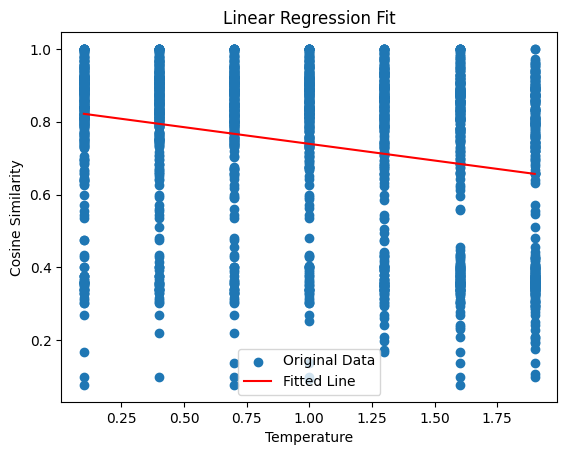

In [89]:
import statsmodels.api as sm

# Assuming your data is stored in a pandas DataFrame called 'data'
# X variables
X = data[data["model"] == "LLama_7B_4bits"][["temperature"]]
# Add constant for the intercept term
X = sm.add_constant(X)
# y variable
y = data[data["model"] == "LLama_7B_4bits"]["cosine_similarity"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())

import matplotlib.pyplot as plt

# Plotting original data points
plt.scatter(X["temperature"], y, label="Original Data")

# Plotting the fitted line
plt.plot(X["temperature"], model.fittedvalues, color="red", label="Fitted Line")

# Adding labels and title
plt.xlabel("Temperature")
plt.ylabel("Cosine Similarity")
plt.title("Linear Regression Fit")

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [92]:
import statsmodels.api as sm

# Assuming your data is stored in a pandas DataFrame called 'data'
# X variables
X = data[["temperature", "model_size", "prompt_length", "ground_truth_length"]]
# Add constant for the intercept term
# y variable
y = data["cosine_similarity"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())


# Hypothesis tests
print("T-test for temperature coefficient:")
print(model.t_test([1, 0, 0, 0]))

print("T-test for model_size coefficient:")
print(model.t_test([0, 1, 0, 0]))

print("T-test for prompt_length coefficient:")
print(model.t_test([0, 0, 1, 0]))

print("T-test for ground_truth_length coefficient:")
print(model.t_test([0, 0, 0, 1]))

                                 OLS Regression Results                                
Dep. Variable:      cosine_similarity   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              7368.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:56:48   Log-Likelihood:                         -5108.3
No. Observations:               10498   AIC:                                  1.022e+04
Df Residuals:                   10494   BIC:                                  1.025e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Non-linear

In [103]:
data.model.value_counts()

model
llama270b          2100
Mistral7_8b        2100
LLama_7B_4bits     2100
LLama_13B_4bits    2100
llama213b          2098
Name: count, dtype: int64

Coefficients: [ 0.          0.27648485 -0.65578068  0.49517456 -0.12557264]
Intercept: 0.7354746882102716


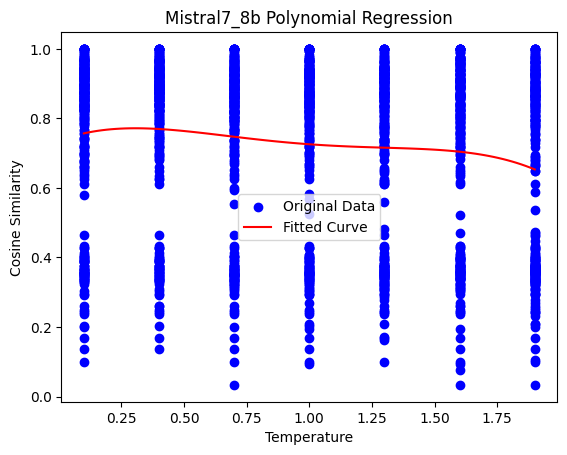

In [106]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming your data is stored in a pandas DataFrame called 'data'
# Extract X and y variables
model = "Mistral7_8b"
X = data[data["model"] == model][["temperature"]].values
y = data[data["model"] == model]["cosine_similarity"].values

# Polynomial features transformation
poly = PolynomialFeatures(degree=4)  # You can adjust the degree as needed
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Print coefficients and intercept
print("Coefficients:", poly_model.coef_)
print("Intercept:", poly_model.intercept_)


# Plot original data
plt.scatter(X, y, color="blue", label="Original Data")

# Plot fitted curve
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_fit = poly_model.predict(poly.fit_transform(X_fit))
plt.plot(X_fit, y_fit, color="red", label="Fitted Curve")

plt.xlabel("Temperature")
plt.ylabel("Cosine Similarity")
plt.title(f"{model} Polynomial Regression")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv(
    "resource/experiment_results/postprocessing/300_questions_4bits_post_processed_simularities.csv"
)
data1 = pd.read_csv(
    "resource/experiment_results/postprocessing/300_questions_post_processed_simularities.csv"
)
# data = pd.concat([data1, data], ignore_index=True)

In [67]:
import pandas as pd


def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers


outlier_frames = []

for (model, temperature), group in data.groupby(["model", "temperature"]):
    outliers = detect_outliers(group["cosine_similarity"])
    outlier_frames.append(group[outliers])

outlier_df = pd.concat(outlier_frames)

In [69]:
outlier_df.to_excel("300_questions_outlier_post_processed_cosine_simularity.xlsx")

In [71]:
outlier_df.temperature.value_counts()

temperature
0.4    151
1.0    114
0.1    113
0.7    111
1.3     47
1.6     42
Name: count, dtype: int64

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

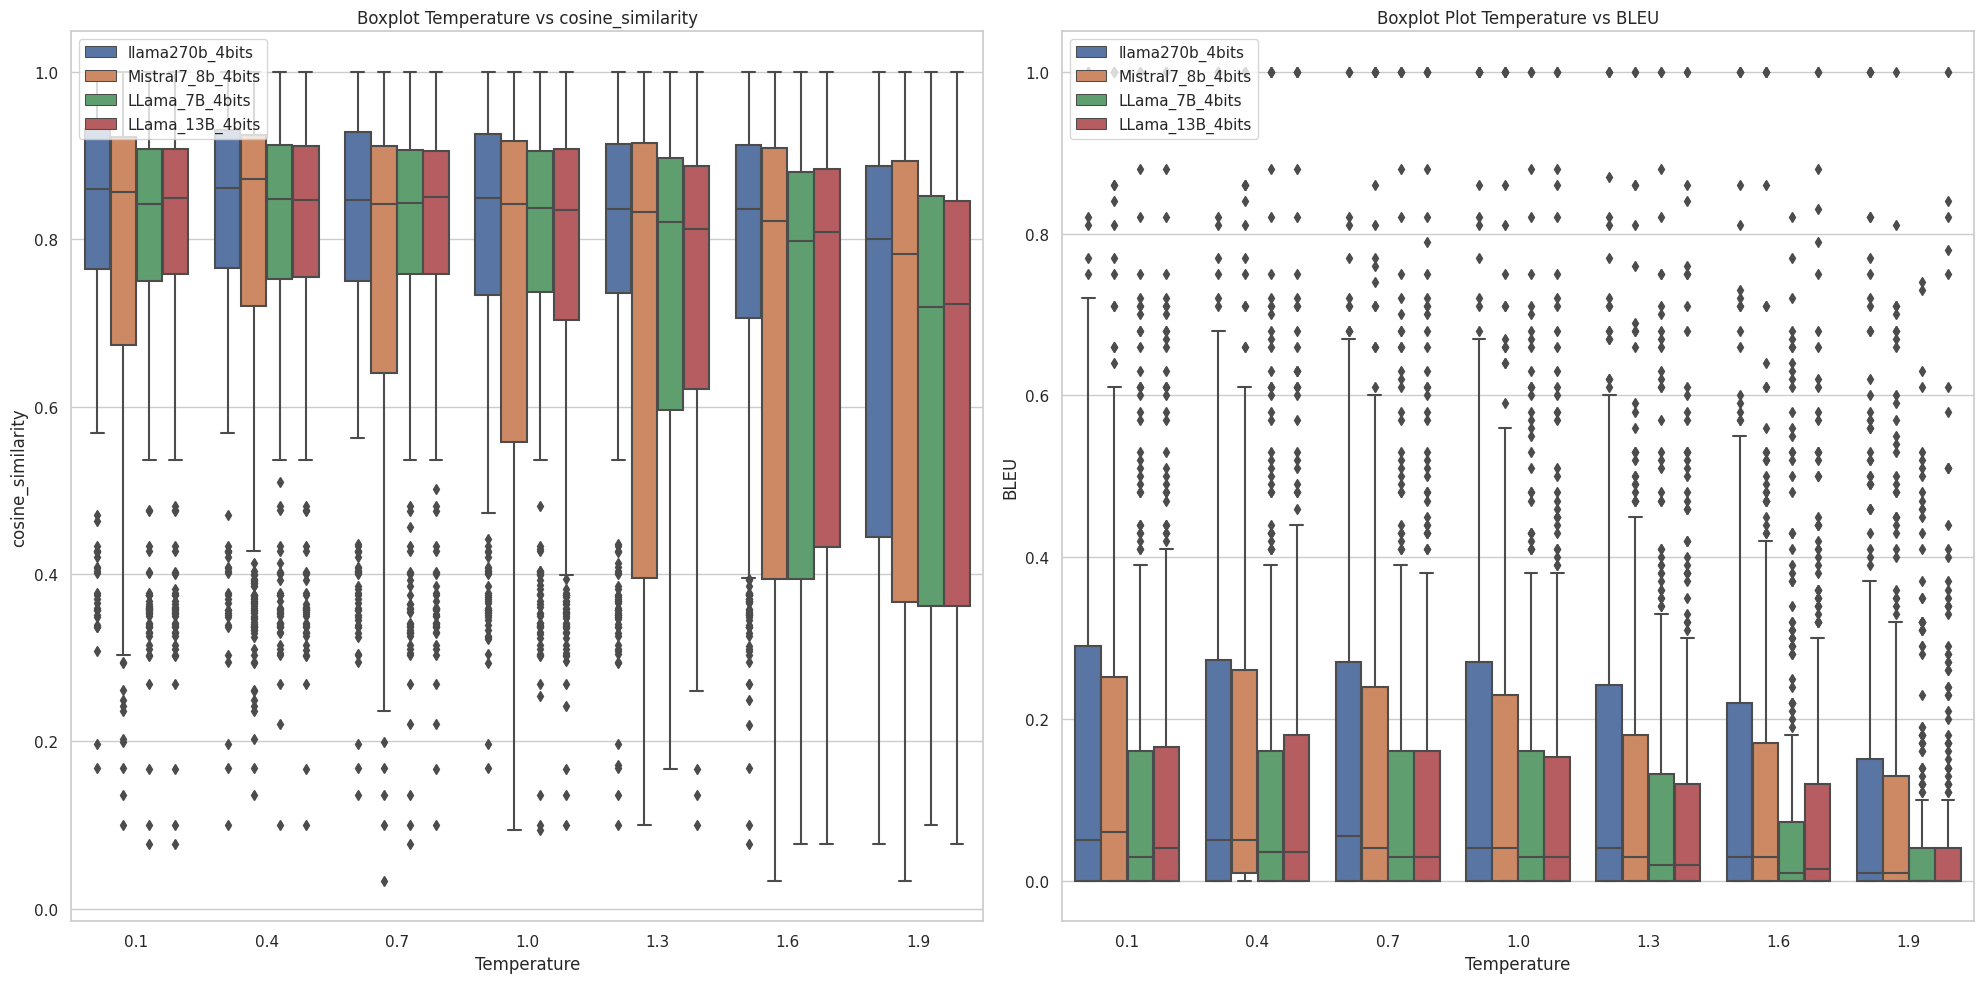

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Boxplot
sns.boxplot(
    x=data_copy["temperature"],
    y=data_copy["cosine_similarity"],
    hue=data_copy["model"],
    ax=axes[0],
)
axes[0].set_title("Boxplot Temperature vs cosine_similarity")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("cosine_similarity")
axes[0].legend(loc="upper left")

# Scatter plot for BLEU
sns.boxplot(
    x=data_copy["temperature"],
    y=data_copy["BLEU"],
    hue=data_copy["model"],
    ax=axes[1],
)
axes[1].set_title("Boxplot Plot Temperature vs BLEU")
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel("BLEU")
axes[1].legend(loc="upper left")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

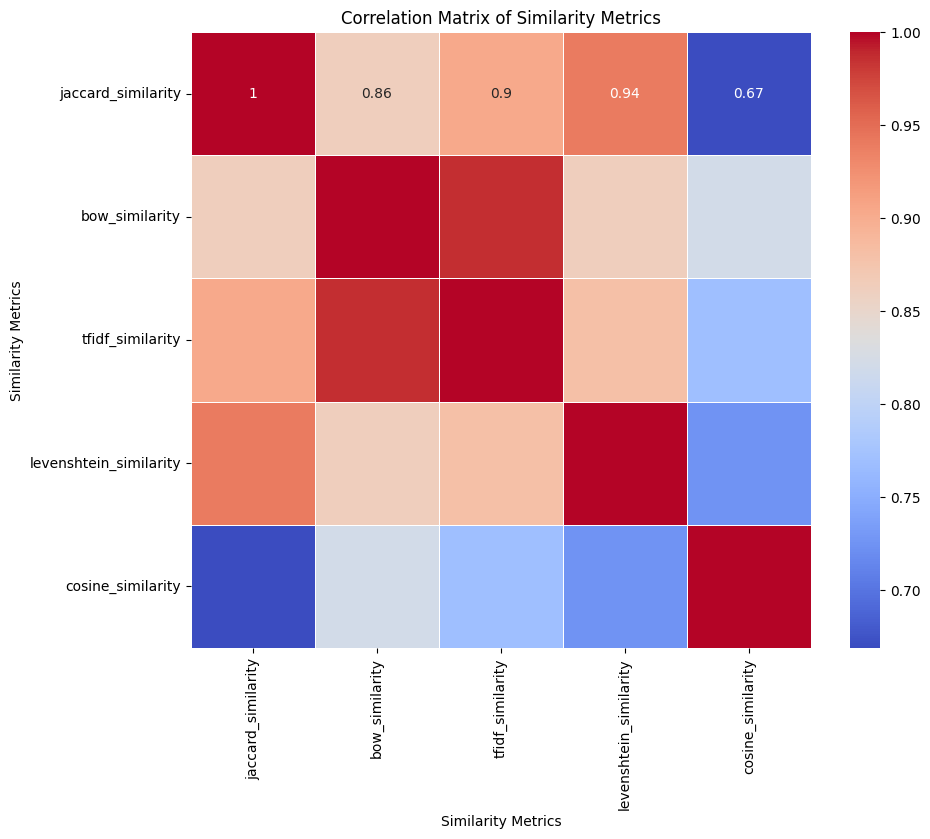

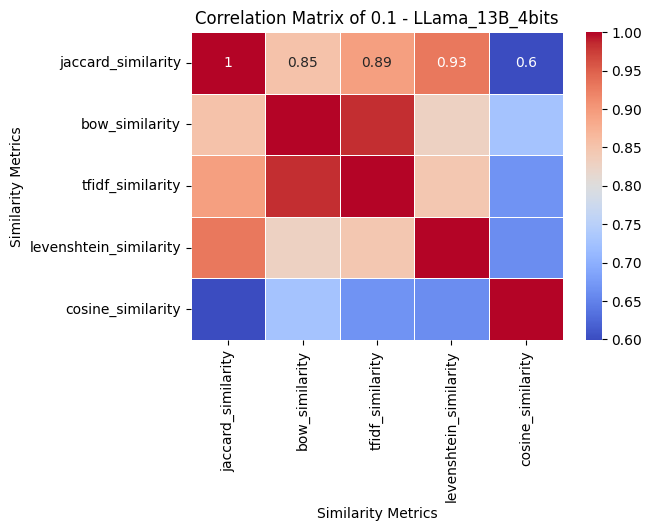

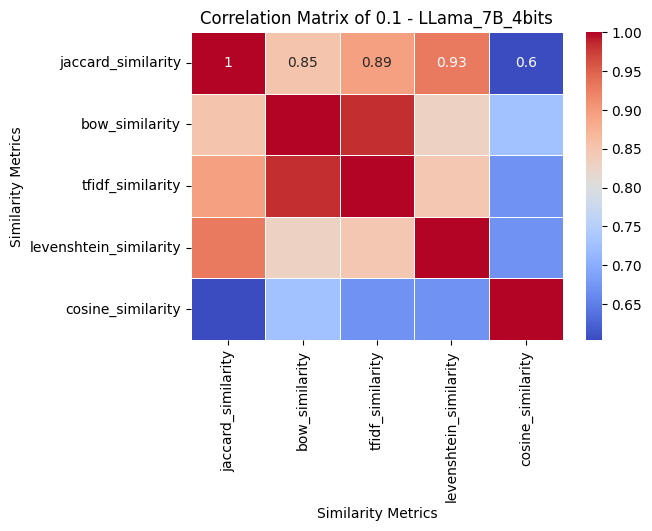

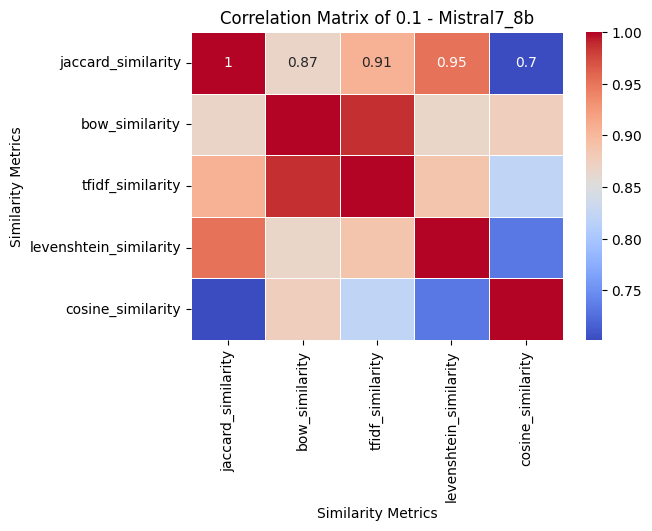

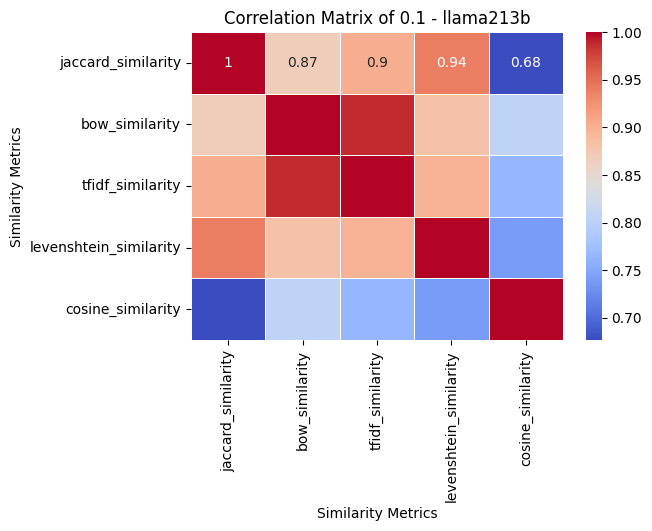

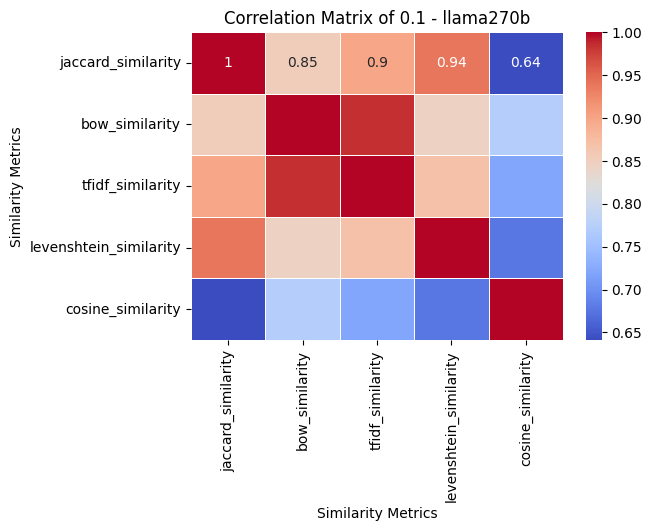

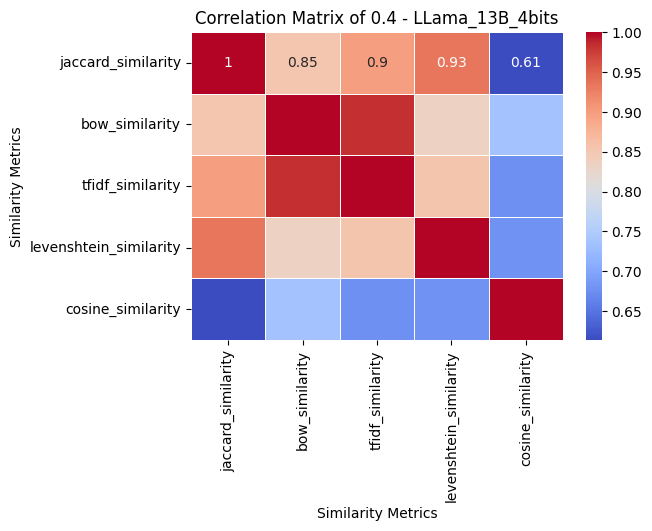

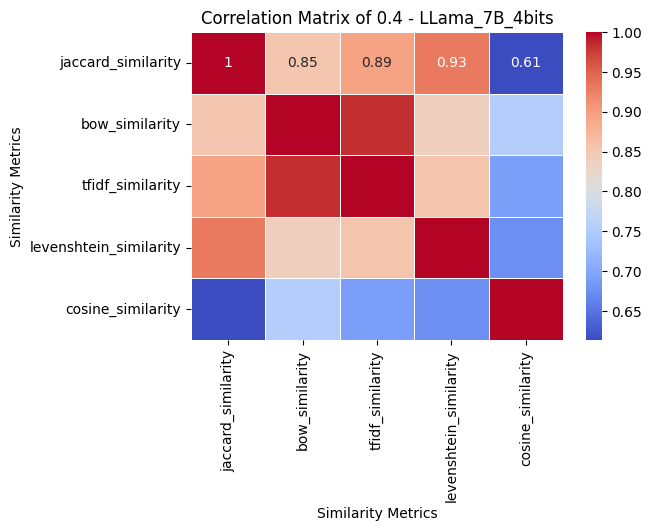

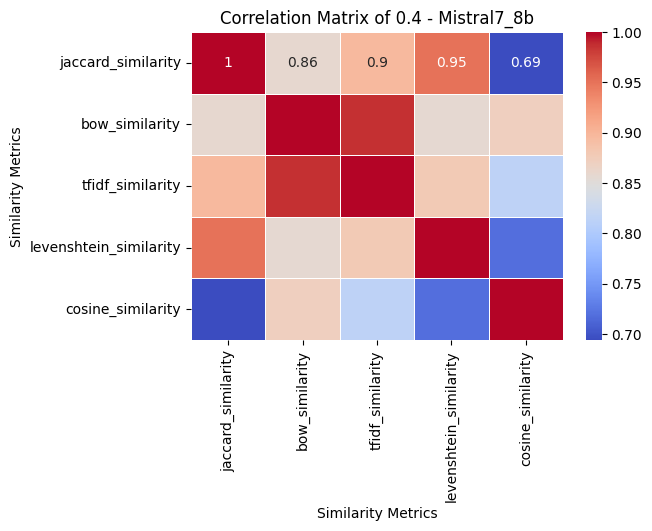

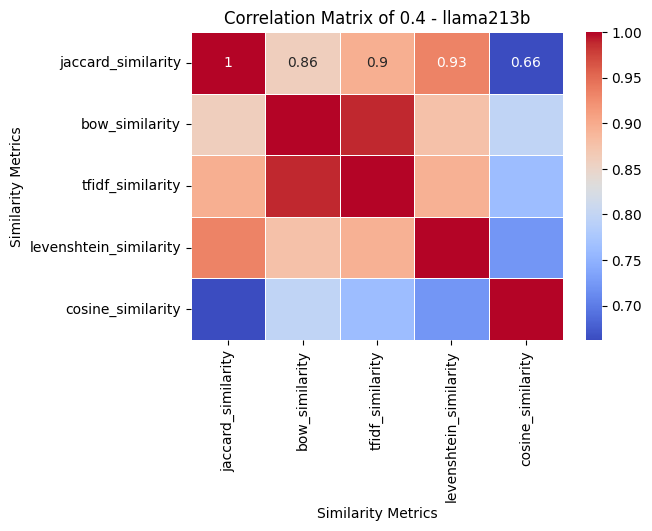

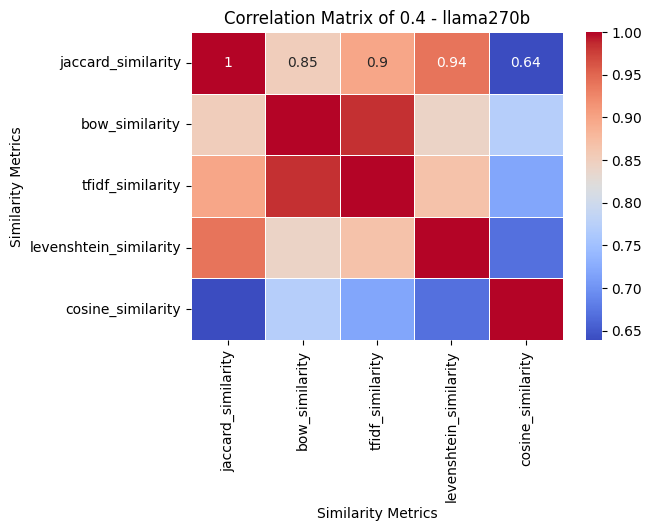

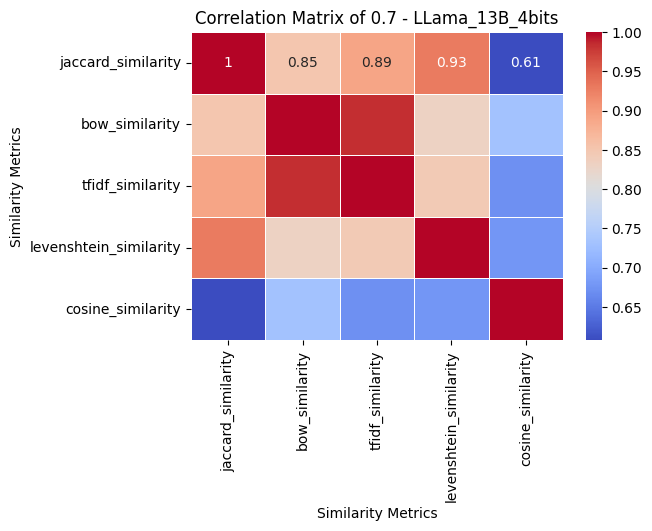

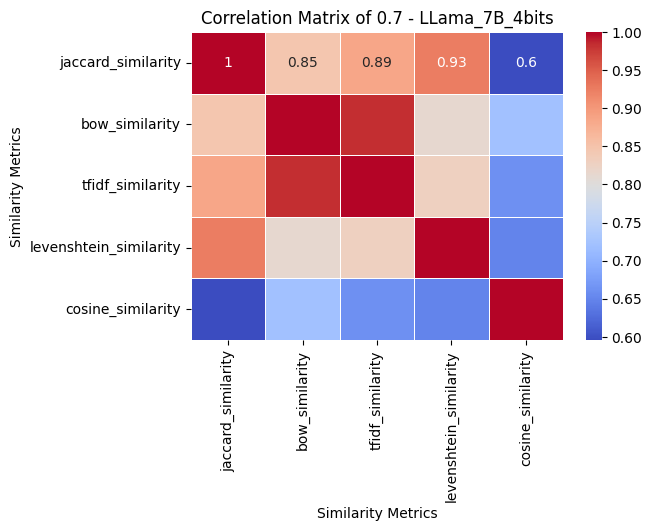

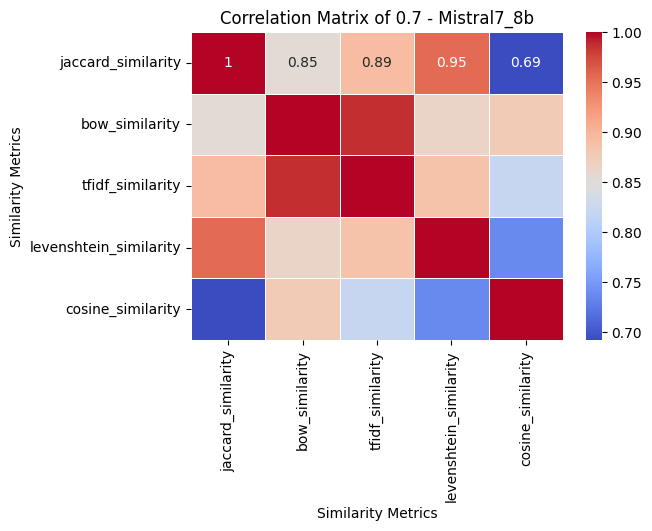

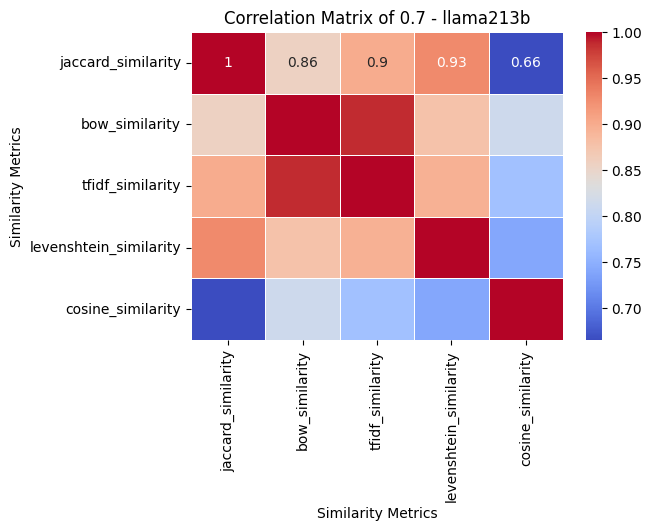

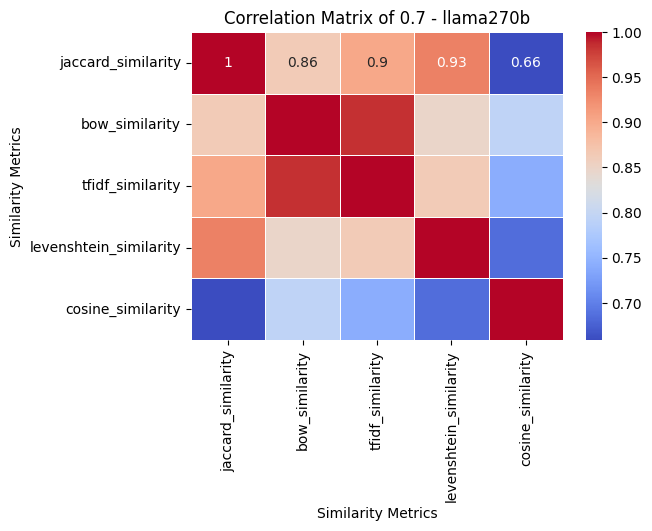

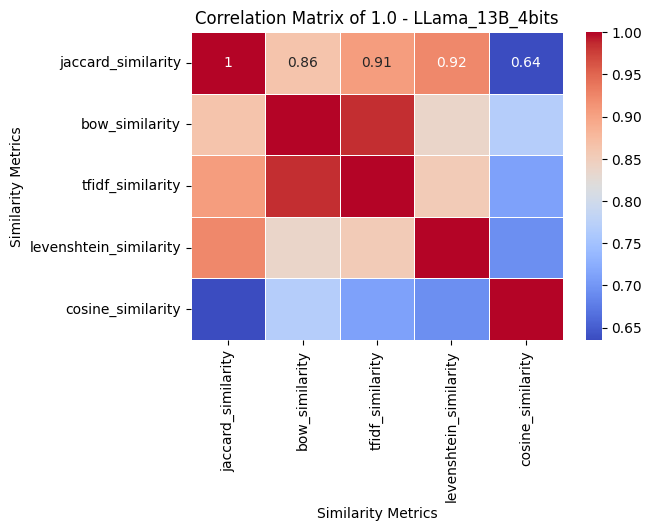

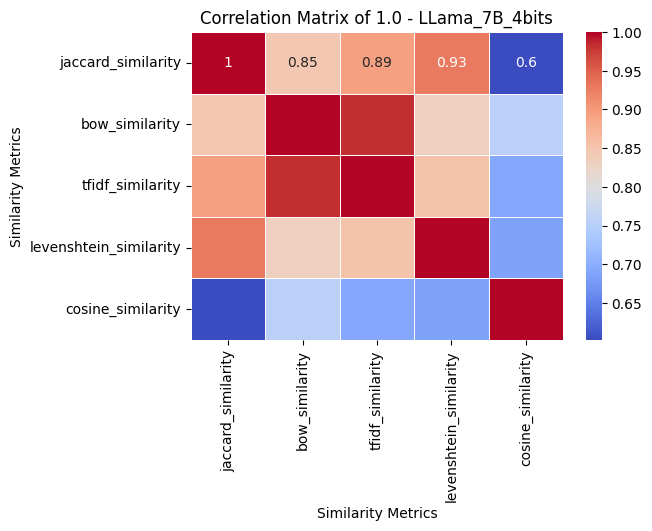

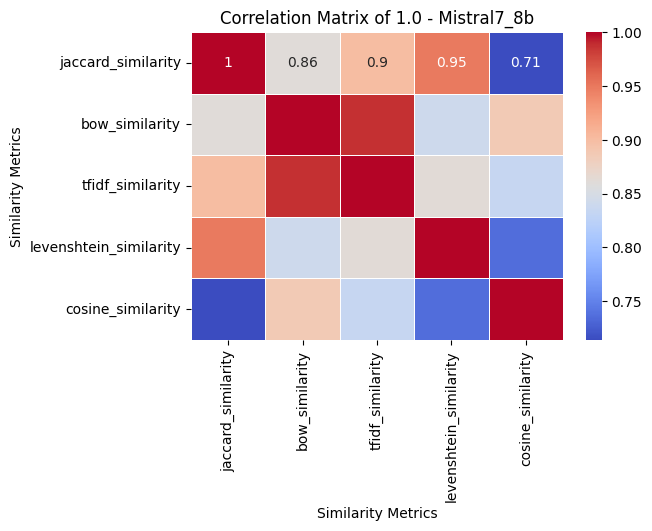

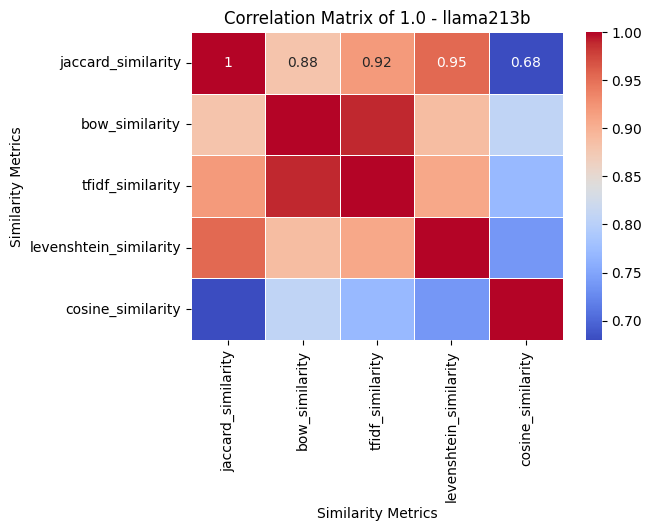

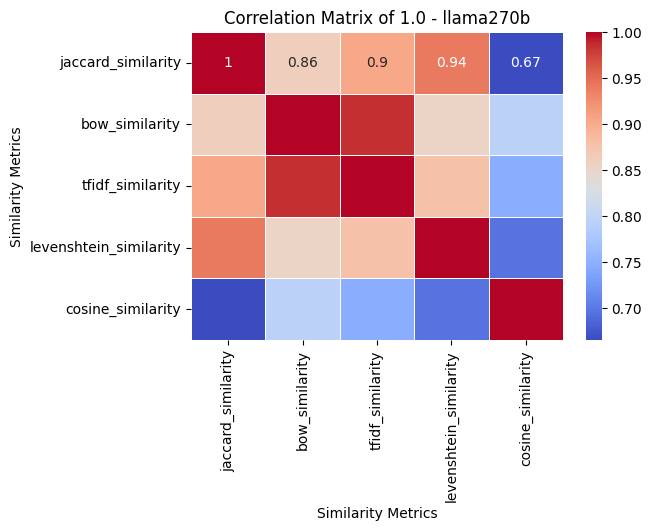

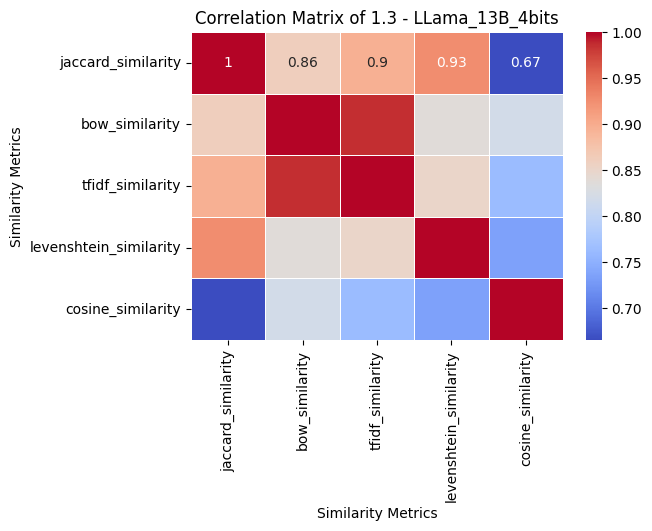

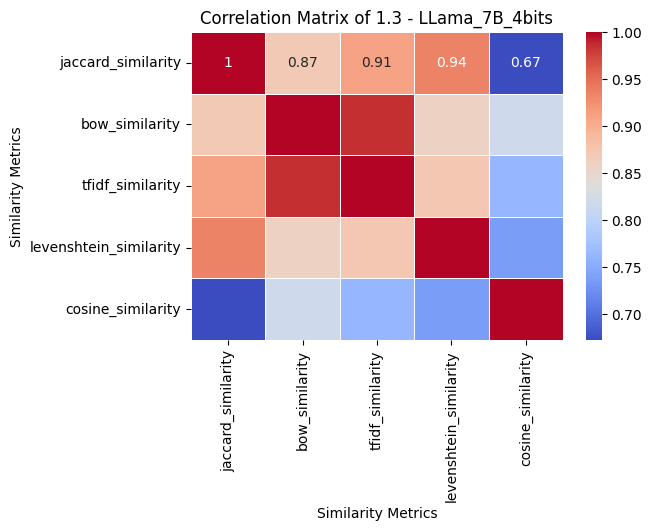

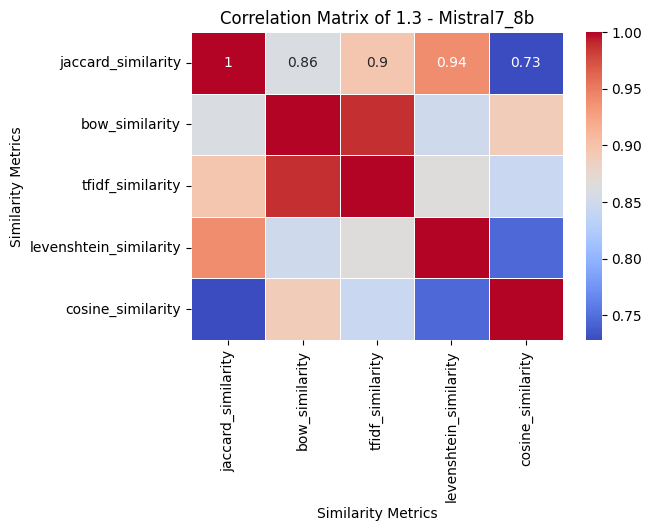

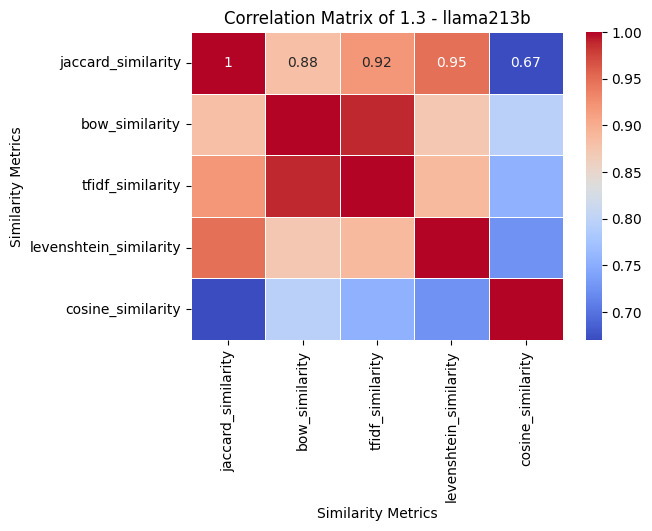

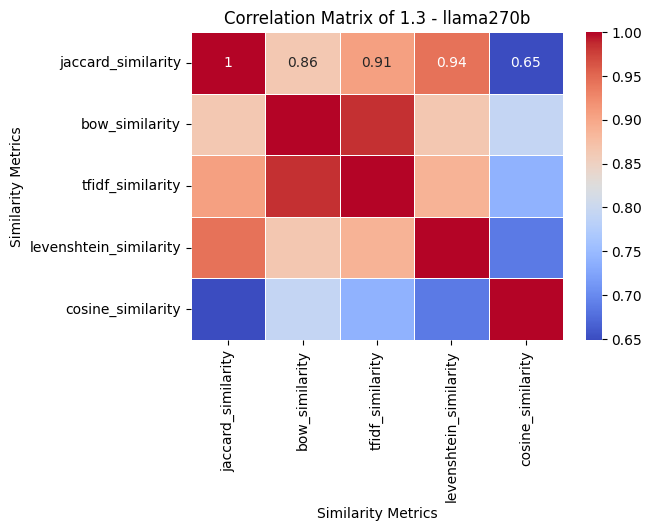

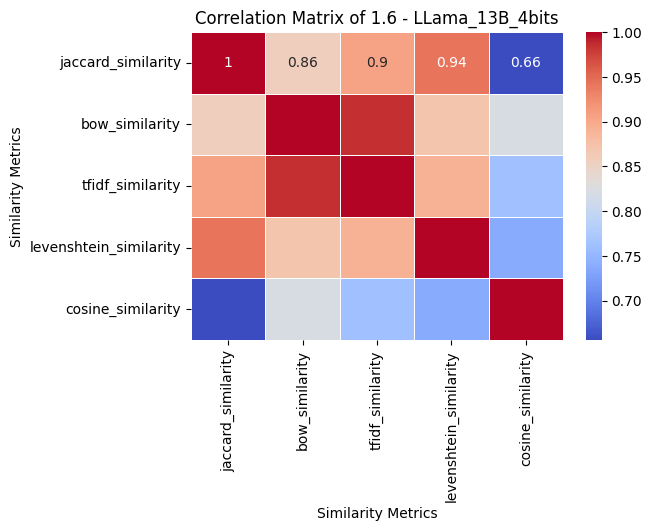

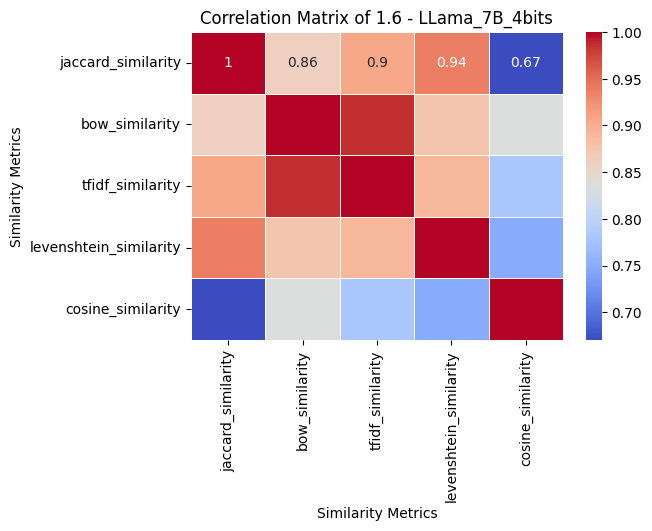

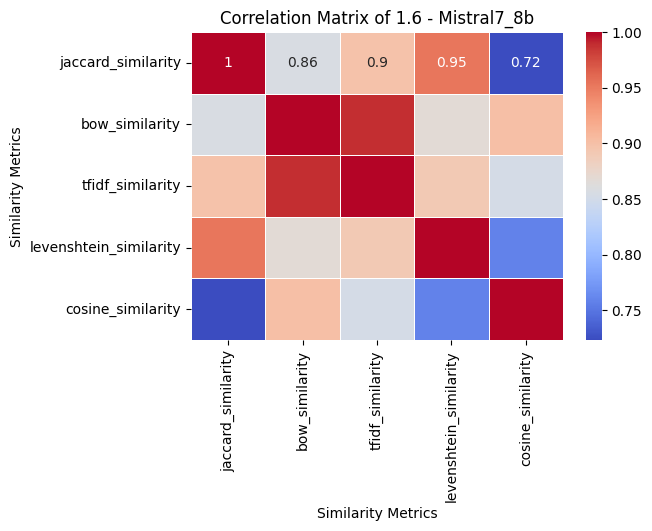

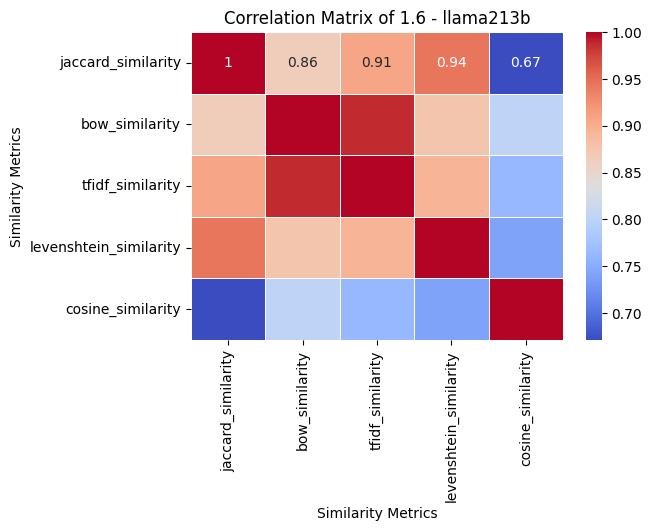

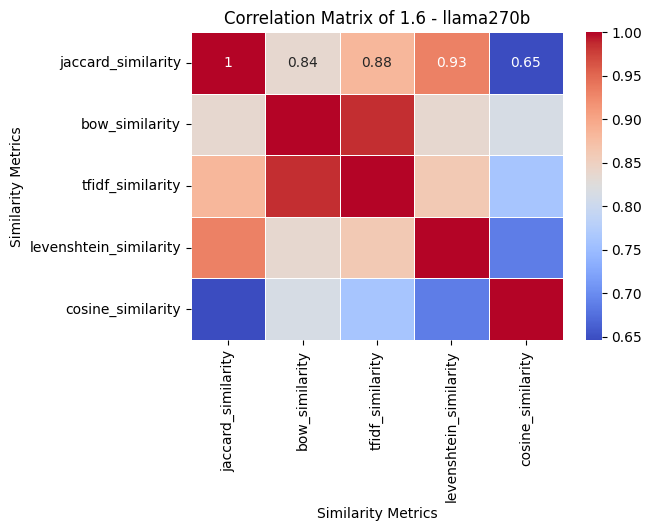

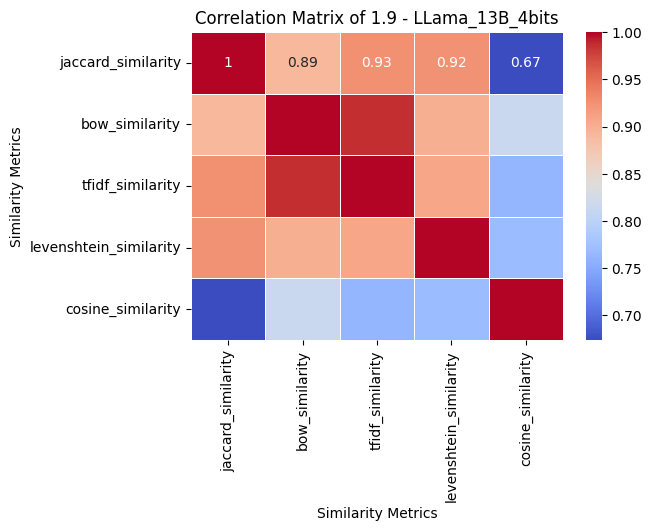

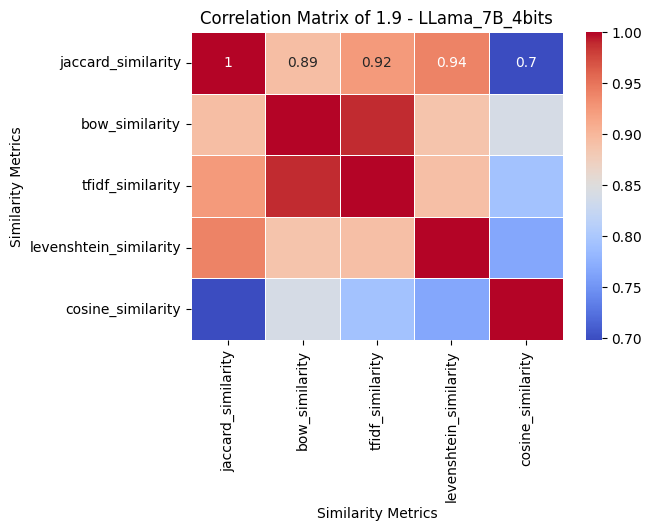

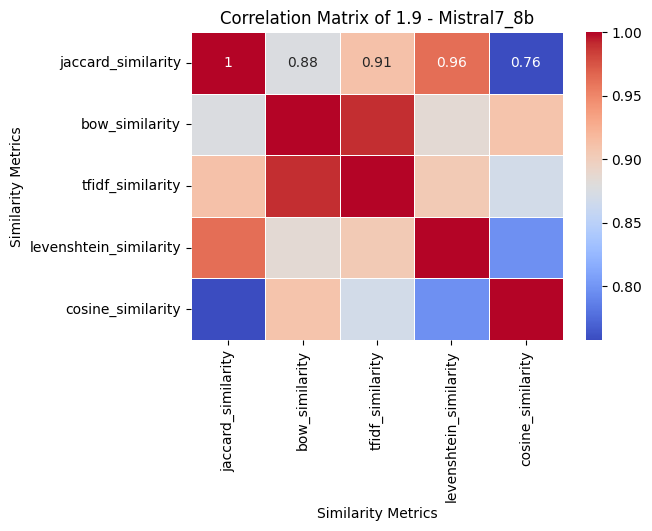

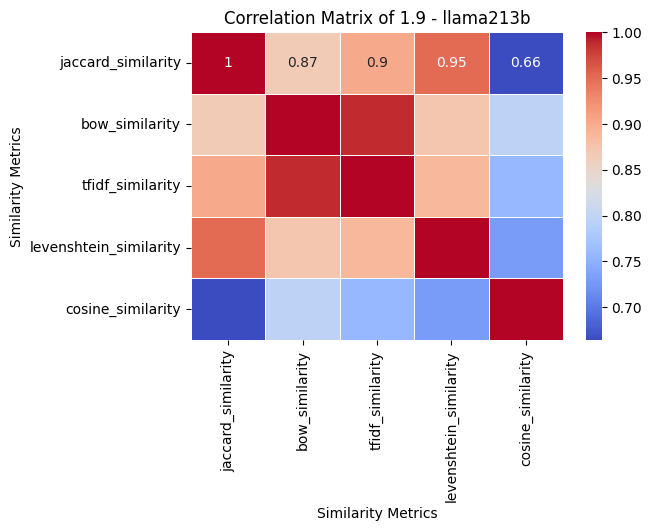

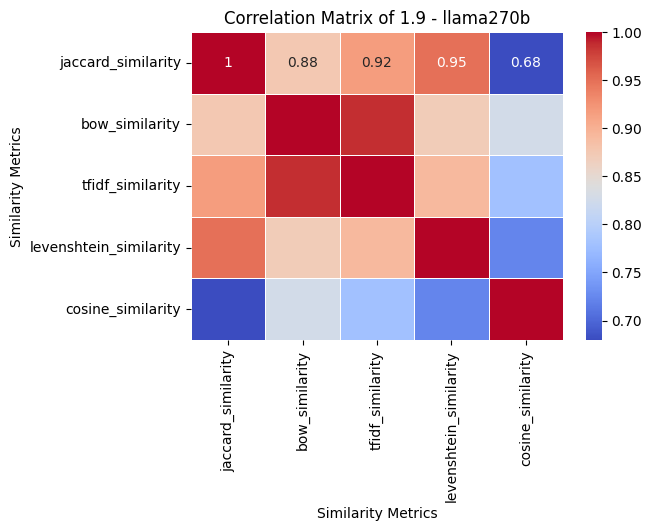

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = [
    "jaccard_similarity",
    "bow_similarity",
    "tfidf_similarity",
    "levenshtein_similarity",
    "cosine_similarity",
]

correlation_matrix = data[selected_columns].corr()

# correlation_matrix = correlation_matrix.unstack(level=-1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Similarity Metrics")
plt.xlabel("Similarity Metrics")
plt.ylabel("Similarity Metrics")
plt.show()

grouped = data.groupby(["temperature", "model"])
for group_name, group_data in grouped:
    correlation_matrix = group_data[selected_columns].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Matrix of {group_name[0]} - {group_name[1]}")
    plt.xlabel("Similarity Metrics")
    plt.ylabel("Similarity Metrics")
    plt.show()

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

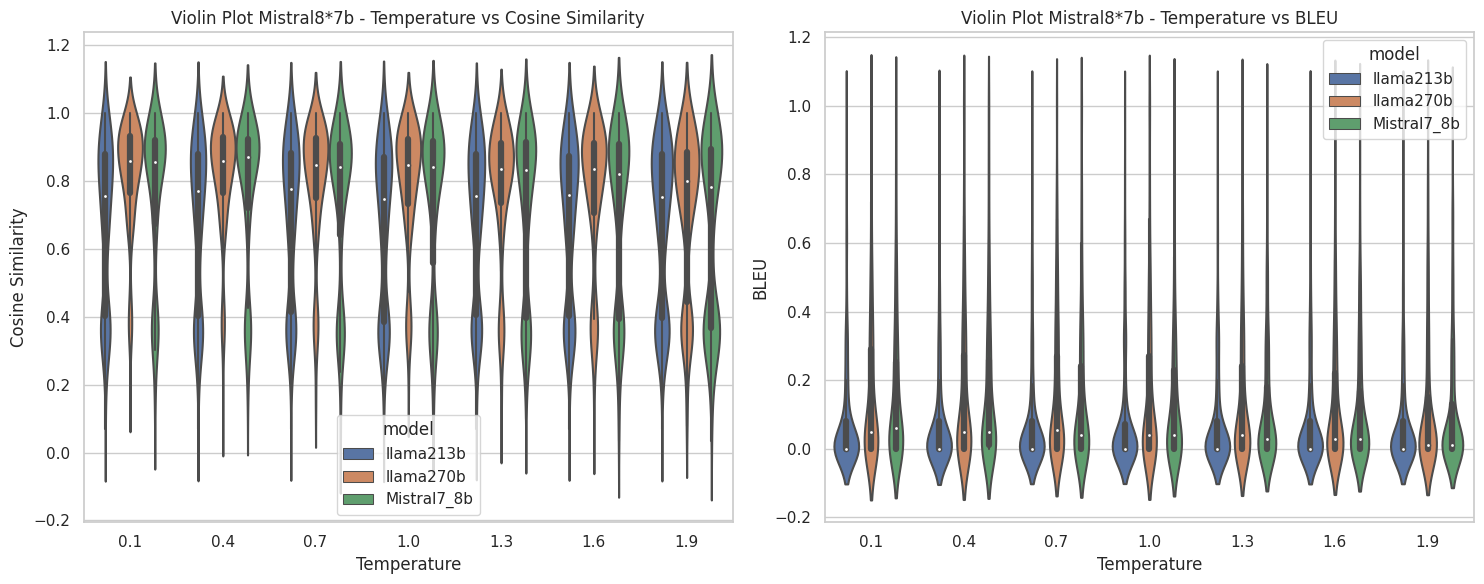

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Violin Plot for Cosine Similarity
sns.violinplot(
    x=data["temperature"],
    y=data["cosine_similarity"],
    hue=data["model"],
    ax=axes[0],
)
axes[0].set_title("Violin Plot Mistral8*7b - Temperature vs Cosine Similarity")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Cosine Similarity")

# Violin Plot for BLEU
sns.violinplot(
    x=data["temperature"],
    y=data["BLEU"],
    hue=data["model"],
    ax=axes[1],
)
axes[1].set_title("Violin Plot Mistral8*7b - Temperature vs BLEU")
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel("BLEU")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

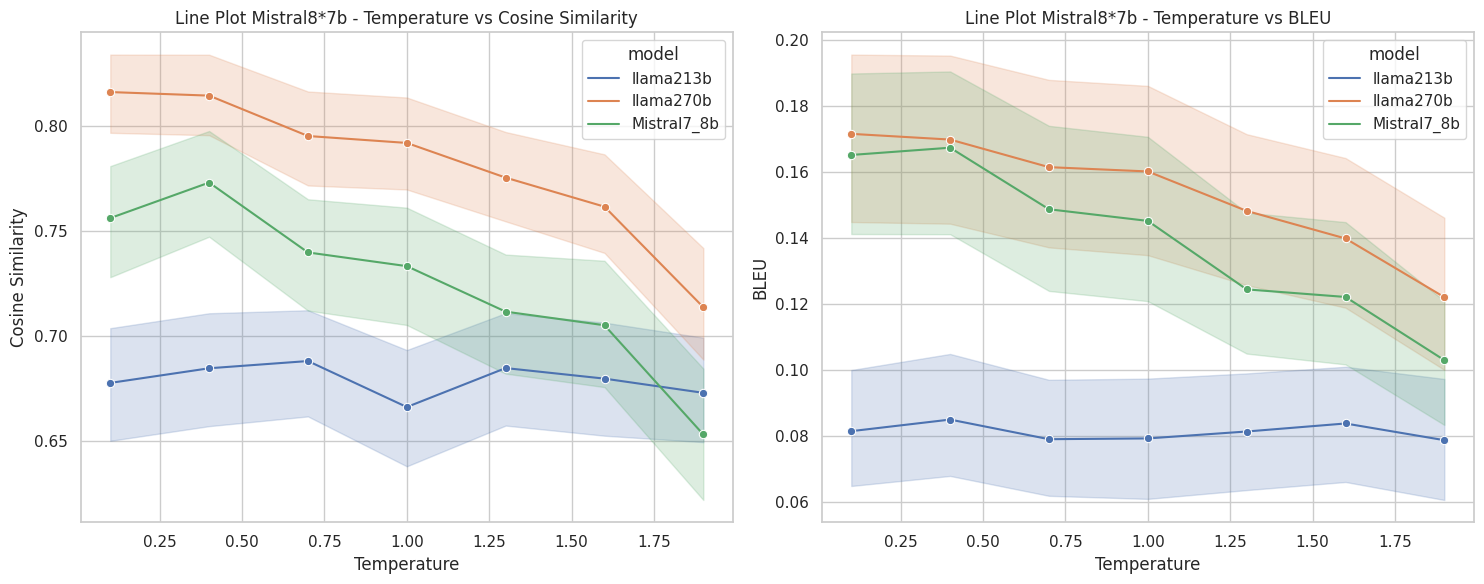

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("300_questions_post_processed_simularities.csv")
sns.set(style="whitegrid")

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Line Plot for Cosine Similarity
sns.lineplot(
    x=data["temperature"],
    y=data["cosine_similarity"],
    hue=data["model"],
    ax=axes[0],
    marker="o",
)
axes[0].set_title("Line Plot Mistral8*7b - Temperature vs Cosine Similarity")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Cosine Similarity")

# Line Plot for BLEU
sns.lineplot(
    x=data["temperature"],
    y=data["BLEU"],
    hue=data["model"],
    ax=axes[1],
    marker="o",
)
axes[1].set_title("Line Plot Mistral8*7b - Temperature vs BLEU")
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel("BLEU")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

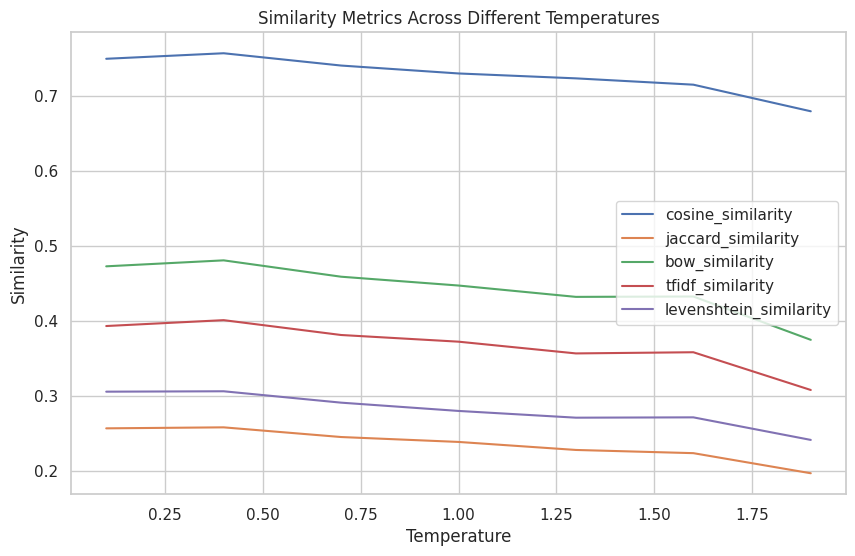

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("300_questions_post_processed_simularities.csv")
averages = (
    data[
        [
            "temperature",
            "cosine_similarity",
            "jaccard_similarity",
            "bow_similarity",
            "tfidf_similarity",
            "levenshtein_similarity",
        ]
    ]
    .groupby("temperature")
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

for similarity in [
    "cosine_similarity",
    "jaccard_similarity",
    "bow_similarity",
    "tfidf_similarity",
    "levenshtein_similarity",
]:
    plt.plot(
        averages["temperature"],
        averages[similarity],
        label=similarity,
    )

plt.xlabel("Temperature")
plt.ylabel("Similarity")
plt.title("Similarity Metrics Across Different Temperatures")
plt.legend()
plt.grid(True)
plt.show()

,Unnamed: 0.1,Unnamed: 0,temperature,model,ground_truth,prompt,response,extracted_answer,label,time_cost,...,generated_response_matching,BLEU,cosine_similarity,prompt_length,ground_truth_lenght,model_size,jaccard_similarity,bow_similarity,tfidf_similarity,levenshtein_similarity
0,0,0,0.1,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.553269,...,\nVirgin Australia started operating on 31 Aug...,0.27,0.778802,791,106,13,0.368421,0.726273,0.588322,0.509434
1,1,1,0.4,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.552879,...,\nVirgin Australia started operating on 31 Aug...,0.27,0.778802,791,106,13,0.368421,0.726273,0.588322,0.509434
2,2,2,0.7,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.545521,...,\nVirgin Australia started operating on 31 Aug...,0.27,0.778802,791,106,13,0.368421,0.726273,0.588322,0.509434
3,3,3,1.0,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.556475,...,\nVirgin Australia started operating on 31 Aug...,0.27,0.778802,791,106,13,0.368421,0.726273,0.588322,0.509434
4,4,4,1.3,llama213b,Virgin Australia commenced services on 31 Augu...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Virgin Australia started operating on 31 Augus...,True,0.546265,...,\nVirgin Australia started operating on 31 Aug...,0.27,0.778802,791,106,13,0.368421,0.726273,0.588322,0.509434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,6293,6293,0.7,Mistral7_8b,Tim McCann,\nInstruction:\nPlease strictly answer my ques...,\nInstruction:\nPlease strictly answer my ques...,Tim McCann,True,1.134523,...,\nTim McCann,0.32,1.000000,788,10,45,1.000000,1.000000,1.000000,0.909091
6294,6294,6294,1.0,Mistral7_8b,Tim McCann,\nInstruction:\nPlease strictly answer my ques...,\nInstruction:\nPlease strictly answer my ques...,Tim McCann,True,1.135039,...,\nTim McCann,0.32,1.000000,788,10,45,1.000000,1.000000,1.000000,0.909091
6295,6295,6295,1.3,Mistral7_8b,Tim McCann,\nInstruction:\nPlease strictly answer my ques...,\nInstruction:\nPlease strictly answer my ques...,Tim McCann,True,1.135247,...,\nTim McCann,0.32,1.000000,788,10,45,1.000000,1.000000,1.000000,0.909091
6296,6296,6296,1.6,Mistral7_8b,Tim McCann,\nInstruction:\nPlease strictly answer my ques...,\nInstruction:\nPlease strictly answer my ques...,\nInstruction:\nPlease strictly answer my ques...,False,1.138794,...,\nTim McCann,0.32,1.000000,788,10,45,1.000000,1.000000,1.000000,0.909091


In [4]:
data.to_csv("300_questions_post_processed_simularities.csv")

##  Causal Analysis

In [14]:
import pandas as pd
from utils import evaluate
from sklearn.preprocessing import MinMaxScaler
from utils.evaluate import calculate_cosine_similarity
import re

data = pd.read_csv(
    "resource/experiment_results/postprocessing/300_questions_post_processed.csv"
)

In [15]:
data["prompt_length"] = data["prompt"].apply(len)
data["ground_truth_length"] = data["ground_truth"].apply(len)
model_sizes = {"llama270b": 70, "Mistral7_8b": 45, "llama213b": 13}

data["model_size"] = data["model"].map(model_sizes)

In [16]:
causal_dataset = data[
    [
        "temperature",
        "model_size",
        "prompt_length",
        "ground_truth_length",
        "cosine_similarity",
        "BLEU",
        "time_cost",
    ]
].values

In [17]:
causal_dataset_df = data[
    [
        "temperature",
        "model_size",
        "prompt_length",
        "ground_truth_length",
        "cosine_similarity",
        "BLEU",
        "time_cost",
    ]
]

In [18]:
import os

os.environ["CASTLE_BACKEND"] = "pytorch"

from collections import OrderedDict
import warnings

import numpy as np
import networkx as nx

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, ICALiNGAM, GOLEM

import matplotlib.pyplot as plt
from castle.algorithms import ANMNonlinear

2024-03-25 01:50:32,664 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [19]:
pc = PC()
pc.learn(causal_dataset)

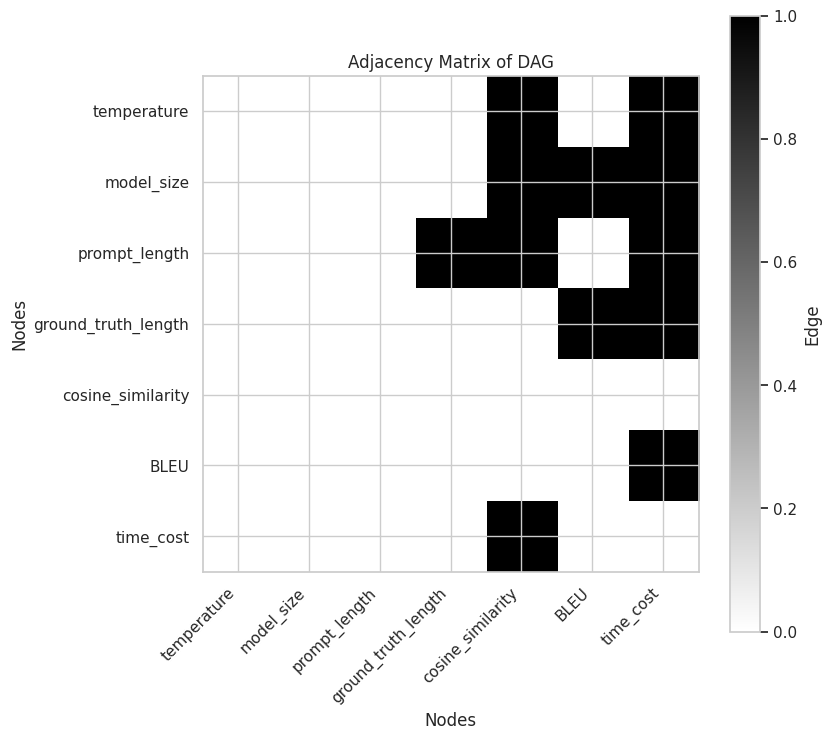

In [20]:
adjacency_matrix = np.array(pc.causal_matrix)
node_labels = [
    "temperature",
    "model_size",
    "prompt_length",
    "ground_truth_length",
    "cosine_similarity",
    "BLEU",
    "time_cost",
]

G = nx.from_numpy_array(adjacency_matrix)
plt.figure(figsize=(8, 8))
plt.imshow(adjacency_matrix, cmap="binary", interpolation="none")
plt.title("Adjacency Matrix of DAG")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.colorbar(label="Edge")
plt.xticks(np.arange(len(G.nodes())), node_labels, rotation=45, ha="right")
plt.yticks(np.arange(len(G.nodes())), node_labels)
plt.show()

In [21]:
import dowhy
from dowhy import CausalModel

import numpy as np
import pandas as pd
import graphviz
import networkx as nx

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

# https://www.pywhy.org/dowhy/v0.11.1/example_notebooks/dowhy_causal_discovery_example.html

In [22]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine="dot")
    names = labels if labels else [f"x{i}" for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d


def str_to_dot(string):
    """
    Converts input string from graphviz library to valid DOT graph format.
    """
    graph = string.strip().replace("\n", ";").replace("\t", "")
    graph = (
        graph[:9] + graph[10:-2] + graph[-1]
    )  # Removing unnecessary characters from string
    return graph

  0%|          | 0/7 [00:00<?, ?it/s]

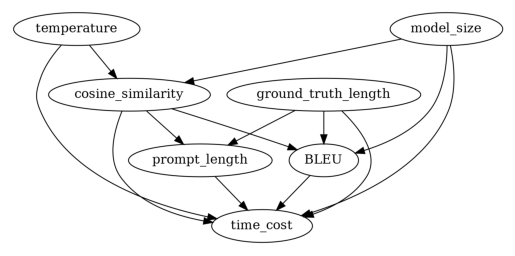

In [23]:
from causallearn.search.ConstraintBased.PC import pc

labels = node_labels
cg = pc(causal_dataset)
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format="png")
plt.axis("off")
plt.imshow(img)
plt.show()

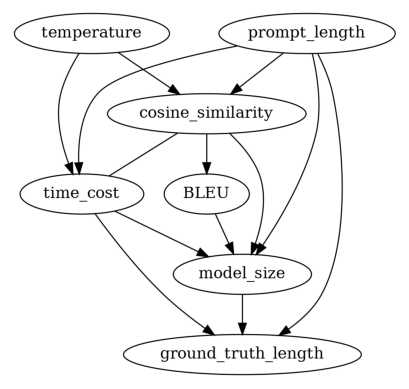

In [24]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
Record = ges(causal_dataset)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record["G"], labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format="png")
plt.axis("off")
plt.imshow(img)
plt.show()

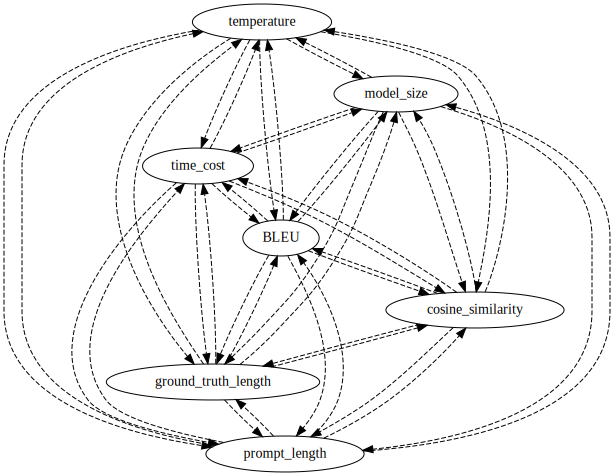

In [25]:
import numpy as np
import pandas as pd

import graphviz
import lingam
from lingam.utils import make_prior_knowledge, make_dot

i = 0
num_labels = []
for label in labels:
    num_labels.append(str(i) + " : " + label)
    i = i + 1


def make_prior_knowledge_graph(prior_knowledge_matrix, labels):
    d = graphviz.Digraph(engine="dot")

    for label in labels:
        d.node(label, label)

    dirs = np.where(prior_knowledge_matrix > 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        d.edge(labels[from_], labels[to])

    dirs = np.where(prior_knowledge_matrix < 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        if to != from_:
            d.edge(labels[from_], labels[to], style="dashed")
    return d


prior_knowledge = make_prior_knowledge(n_variables=7)
make_prior_knowledge_graph(prior_knowledge, labels=labels)
# 0 temperature 1 model_size 2 prompt_length 3 ground_truth_length 4 cosine_similarity 5 BLEU 6 time_cost

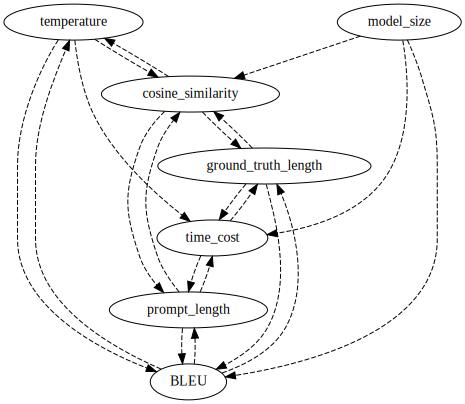

In [30]:
# 0 temperature    1 model_size     2 prompt_length     3 ground_truth_length     4 cosine_similarity    5 BLEU     6 time_cost

prior_knowledge[1, 0] = 0
prior_knowledge[0, 1] = 0
prior_knowledge[1, 2] = 0
prior_knowledge[1, 3] = 0
prior_knowledge[3, 1] = 0
prior_knowledge[1, 4] = 0
prior_knowledge[1, 5] = 0
prior_knowledge[1, 6] = 0
prior_knowledge[0, 2] = 0
prior_knowledge[2, 0] = 0
prior_knowledge[0, 3] = 0
prior_knowledge[4, 4] = 0
prior_knowledge[5, 5] = 0
prior_knowledge[0, 6] = 0
prior_knowledge[2, 3] = 0
prior_knowledge[3, 2] = 0
prior_knowledge[2, 1] = 0
prior_knowledge[1, 2] = 0
prior_knowledge[0, 3] = 0
prior_knowledge[3, 0] = 0
prior_knowledge[5, 4] = 0
prior_knowledge[4, 5] = 0
prior_knowledge[4, 6] = 0
prior_knowledge[6, 4] = 0
prior_knowledge[5, 6] = 0
prior_knowledge[6, 5] = 0
# prior_knowledge[2, 1] = 1
# prior_knowledge[1, 0] = 0
# prior_knowledge[0, 1] = 0
# prior_knowledge[2, 1] = 0
make_prior_knowledge_graph(prior_knowledge, labels=labels)

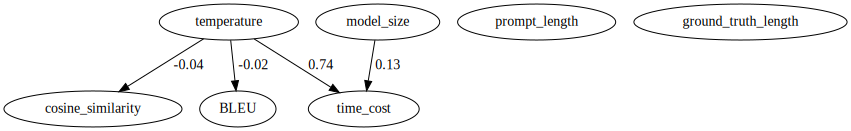

In [31]:
from causallearn.search.FCMBased import lingam

model = lingam.DirectLiNGAM(prior_knowledge=prior_knowledge)
model.fit(causal_dataset)

from causallearn.search.FCMBased.lingam.utils import make_dot

make_dot(model.adjacency_matrix_, labels=labels)

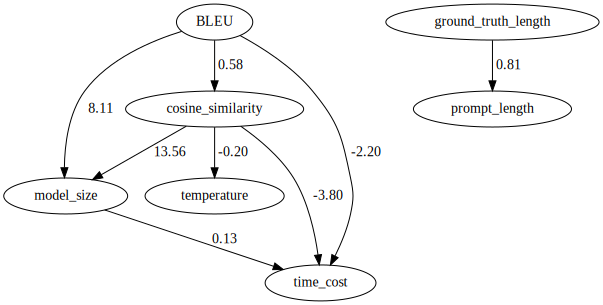

In [70]:
from causallearn.search.FCMBased import lingam

model = lingam.DirectLiNGAM()
model.fit(causal_dataset)

from causallearn.search.FCMBased.lingam.utils import make_dot

make_dot(model.adjacency_matrix_, labels=labels)

In [73]:
# Obtain valid dot format
graph_dot = make_graph(model.adjacency_matrix_, labels=labels)

# Define Causal Model
model = CausalModel(
    data=causal_dataset_df,
    treatment="temperature",
    outcome="cosine_similarity",
    graph=str_to_dot(graph_dot.source),
)

# Identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# Estimation
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1,
    confidence_intervals=True,
    test_significance=True,
)
print("Causal Estimate is " + str(estimate.value))

2024-03-24 23:57:44,130 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_graph.py[line:86] - ERROR: Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                             
──────────────(E[cosine_similarity])
d[temperature]                      
Estimand assumption 1, Unconfoundedness: If U→{temperature} and U→cosine_similarity then P(cosine_similarity|temperature,,U) = P(cosine_similarity|temperature,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate is -0.037090704222053295


/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [69]:
# Obtain valid dot format
graph_dot = make_graph(model.adjacency_matrix_, labels=labels)
# Define Causal Model
model_est = CausalModel(
    data=causal_dataset_df,
    treatment="temperature",
    outcome="cosine_similarity",
    graph=str_to_dot(graph_dot.source),
)

# Identification
identified_estimand = model_est.identify_effect(proceed_when_unidentifiable=False)
print(identified_estimand)

# Estimation
estimate = model_est.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1,
    confidence_intervals=True,
    test_significance=True,
)
print("Causal Estimate is " + str(estimate.value))

2024-03-24 23:56:48,054 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_graph.py[line:86] - ERROR: Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
2024-03-24 23:56:48,073 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_identifier/auto_identifier.py[line:170] - WARNING: No directed path from treatment to outcome. Causal Effect is zero.
2024-03-24 23:56:48,074 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_estimator.py[line:707] - WARNING: No directed path from ['temperature'] to ['cosine_similarity'].


No directed path from ['temperature'] to ['cosine_similarity'] in the causal graph.
Causal effect is zero.
Causal Estimate is 0


In [17]:
import dowhy
from dowhy import CausalModel

G = nx.DiGraph()

for label in node_labels:
    G.add_node(label)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix[i])):
        if adjacency_matrix[i][j] == 1:
            G.add_edge(node_labels[i], node_labels[j])
causal_model = CausalModel(
    data=causal_dataset_df, treatment=None, outcome=None, graph=G
)

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_model.py:582: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(
2024-03-24 21:53:51,778 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_model.py[line:587] - WARNING: The graph defines 7 variables. 6 were found in the dataset and will be analyzed as observed variables. 1 were not found in the dataset and will be analyzed as unobserved variables. The observed variables are: '['BLEU', 'cosine_similarity', 'model_size', 'prompt_length', 'temperature', 'time_cost']'. The unobserved variables are: '['ground_truth_length']'. If this matches your expectations for observations, please continue. If you expected any of the unobserved variables to be in the dataframe, please check for typos.
2024-03-24 21:53:51,779 - /home/lujun/anaconda3/envs/causalLLM/lib

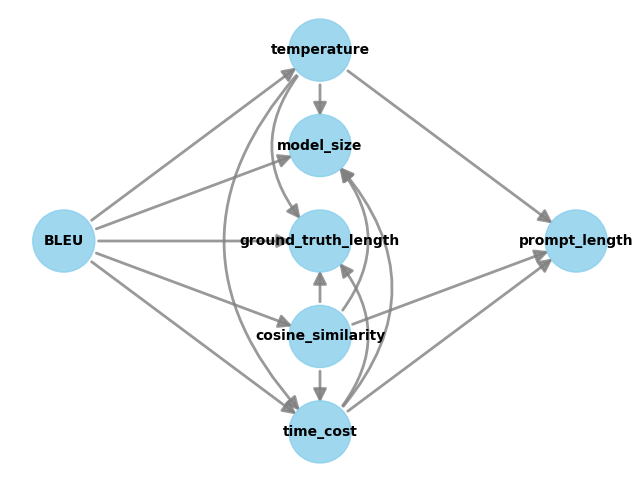

In [18]:
causal_model.view_model()
plt.show()

In [23]:
import dowhy
from dowhy import CausalModel

G = nx.DiGraph()

for label in node_labels:
    G.add_node(label)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix[i])):
        if adjacency_matrix[i][j] == 1:
            G.add_edge(node_labels[i], node_labels[j])

causal_model = CausalModel(
    data=causal_dataset_df,
    treatment=["temperature", "model_size"],
    outcome=[
        "prompt_length",
        "ground_truth_length",
        "cosine_similarity",
        "BLEU",
        "time_cost",
    ],
    graph=G,
)

causal_model.view_model()
plt.show()

identified_estimand = causal_model.identify_effect()
estimate = causal_model.estimate_effect(
    identified_estimand, method_name="backdoor.propensity_score_stratification"
)
print(estimate)
print(identified_estimand)

2024-03-19 13:54:17,961 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_model.py[line:505] - INFO: Model to find the causal effect of treatment ['temperature', 'model_size'] on outcome ['prompt_length', 'ground_truth_length', 'cosine_similarity', 'BLEU', 'time_cost']
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_model.py:582: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(
2024-03-19 13:54:17,964 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_model.py[line:587] - WARNING: The graph defines 7 variables. 6 were found in the dataset and will be analyzed as observed variables. 1 were not found in the dataset and will be analyzed as unobserved variables. The observed variables are: '['BLEU', 'cosine_similarity', 'model_size', 'prompt_length', 'temperature', 'ti

2024-03-19 13:56:20,838 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_identifier/auto_identifier.py[line:170] - WARNING: No directed path from treatment to outcome. Causal Effect is zero.
2024-03-19 13:56:20,840 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_model.py[line:329] - INFO: linear_regression
2024-03-19 13:56:20,841 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_estimators/linear_regression_estimator.py[line:70] - INFO: INFO: Using Linear Regression Estimator
2024-03-19 13:56:20,842 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_estimator.py[line:707] - WARNING: No directed path from ['temperature', 'model_size'] to ['prompt_length', 'ground_truth_length', 'cosine_similarity', 'BLEU', 'time_cost'].
2024-03-19 13:56:20,842 - /home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/dowhy/causal_identifier/auto_identifier.py[line:170] - WAR

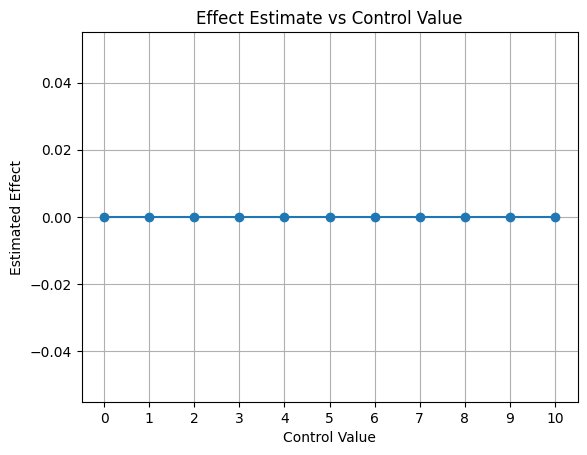

In [29]:
import matplotlib.pyplot as plt

estimate_values = []

for control_value in range(11):
    identified_estimand = causal_model.identify_effect()
    estimate = causal_model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression",
        control_value=control_value,
    )
    estimate_values.append(estimate.value)

plt.plot(range(11), estimate_values, marker="o")
plt.xlabel("Control Value")
plt.ylabel("Estimated Effect")
plt.title("Effect Estimate vs Control Value")
plt.xticks(range(11))
plt.grid(True)
plt.show()